# Implémentation Professionnelle de l'Algorithme K-Medoids avec Visualisation

Je vais vous présenter une implémentation complète de l'algorithme K-Medoids (PAM - Partitioning Around Medoids) en utilisant Python, avec un jeu de données réel de Kaggle, des visualisations professionnelles et des explications détaillées.

## 1. Préparation de l'environnement


In [1]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from KMedoids_Scratch import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

# Configuration pour des visualisations professionnelles
sns.set_theme()
warnings.filterwarnings('ignore')

# Affichage des graphiques directement dans le notebook (utile pour Jupyter)
%matplotlib inline

## 2. Chargement et Exploration des Données

Pour ce projet, j'utiliserai le jeu de données "Mall Customer Segmentation Data" de Kaggle, qui contient des informations sur les clients d'un centre commercial pour une analyse de segmentation.

In [2]:
# Chargement des données (remplacez par le chemin de votre fichier)
try:
    df = pd.read_csv('datasets/Mall_Customers.csv')
except:
    # Si le fichier n'est pas trouvé, nous le téléchargeons directement
    import os
    if not os.path.exists('datasets/Mall_Customers.csv'):
        import urllib.request
        url = 'https://raw.githubusercontent.com/plotly/datasets/master/Mall_Customers.csv'
        urllib.request.urlretrieve(url, 'datasets/Mall_Customers.csv')
    df = pd.read_csv('Mall_Customers.csv')

# Exploration initiale des données
print(f"Dimensions des données : {df.shape}")
print("\nAperçu des données :")
display(df.head())
print("\nStatistiques descriptives :")
display(df.describe())
print("\nInformations sur les données :")
display(df.info())

Dimensions des données : (200, 5)

Aperçu des données :


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Statistiques descriptives :


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



Informations sur les données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None

## 3. Prétraitement des Données

In [3]:
# Nettoyage des données
df.rename(columns={'Genre': 'Gender', 'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'SpendingScore'}, inplace=True)

# Encodage de la variable catégorielle
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Sélection des caractéristiques pertinentes
X = df[['Age', 'Income', 'SpendingScore']]

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réduction de dimension pour la visualisation (optionnelle)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

## 4. Visualisation Initiale des Données

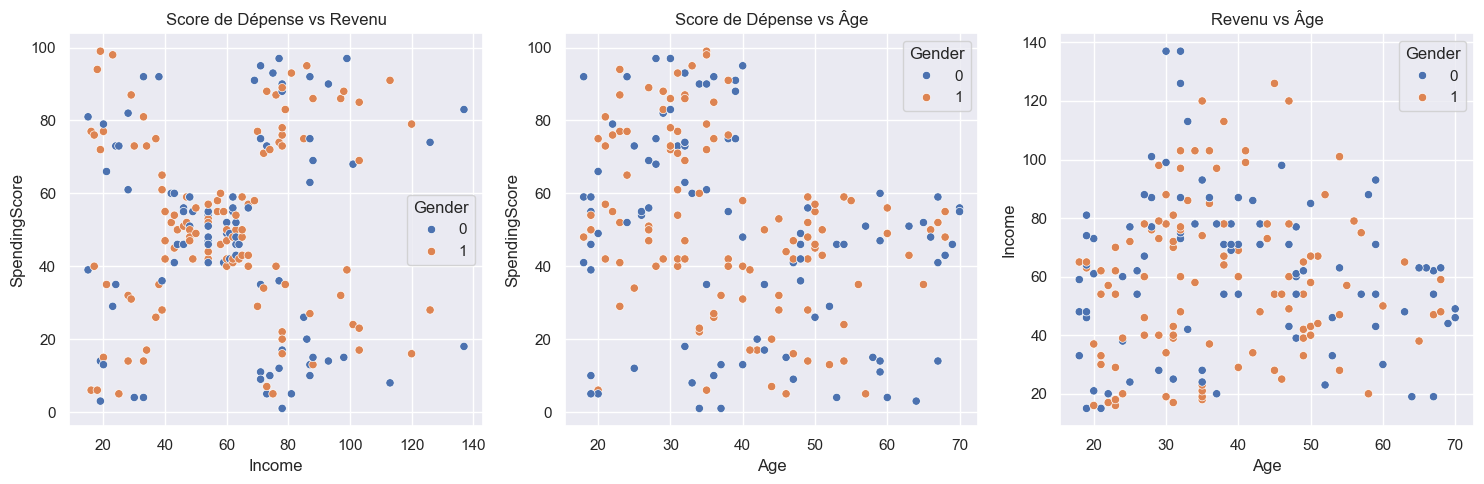

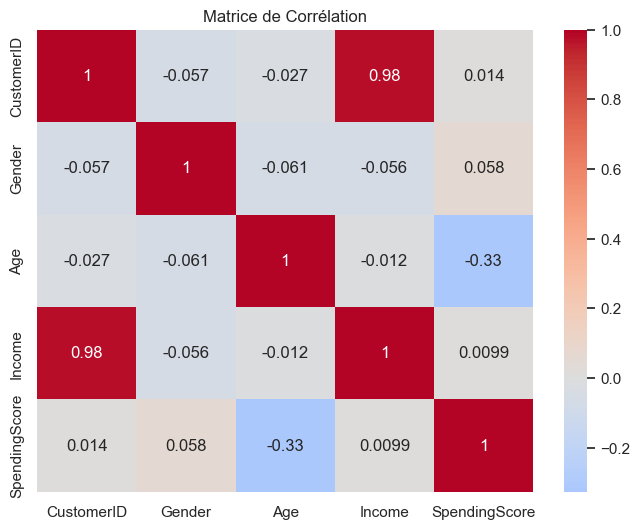

In [4]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Income', y='SpendingScore', hue='Gender')
plt.title('Score de Dépense vs Revenu')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Age', y='SpendingScore', hue='Gender')
plt.title('Score de Dépense vs Âge')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Age', y='Income', hue='Gender')
plt.title('Revenu vs Âge')

plt.tight_layout()
plt.show()

# Matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de Corrélation')
plt.show()

## 5. Détermination du Nombre Optimal de Clusters

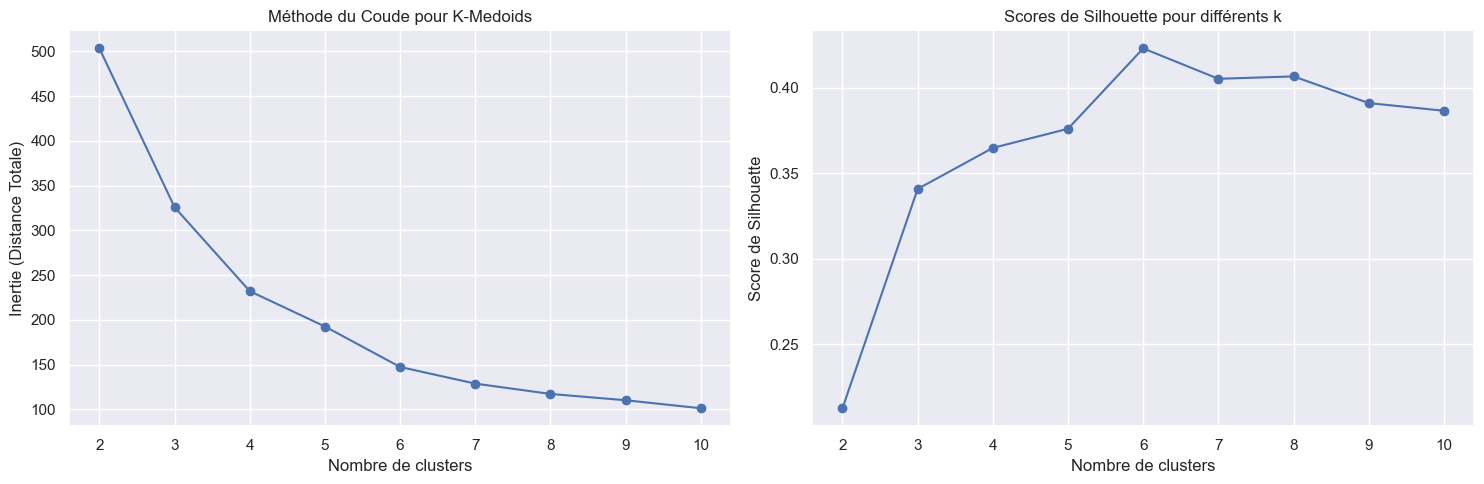

Meilleur nombre de clusters selon silhouette: 6


In [5]:
# Méthode du coude et score de silhouette
range_n_clusters = range(2, 11)
elbow = []
silhouette_scores = []

for n_clusters in range_n_clusters:
    # Initialisation et ajustement du modèle K-Medoids
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
    kmedoids.fit(X_scaled)
    cluster_labels = kmedoids.predict(X_scaled)
    
    # Score d'inertie (distance totale)
    elbow.append(kmedoids.inertia_)
    
    # Score de silhouette
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Visualisation
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, elbow, 'bo-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie (Distance Totale)')
plt.title('Méthode du Coude pour K-Medoids')

plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, 'bo-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de Silhouette')
plt.title('Scores de Silhouette pour différents k')

plt.tight_layout()
plt.show()

# Clustering final avec le meilleur k
best_k = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Meilleur nombre de clusters selon silhouette: {best_k}")

## 6. Implémentation de K-Medoids avec k optimal

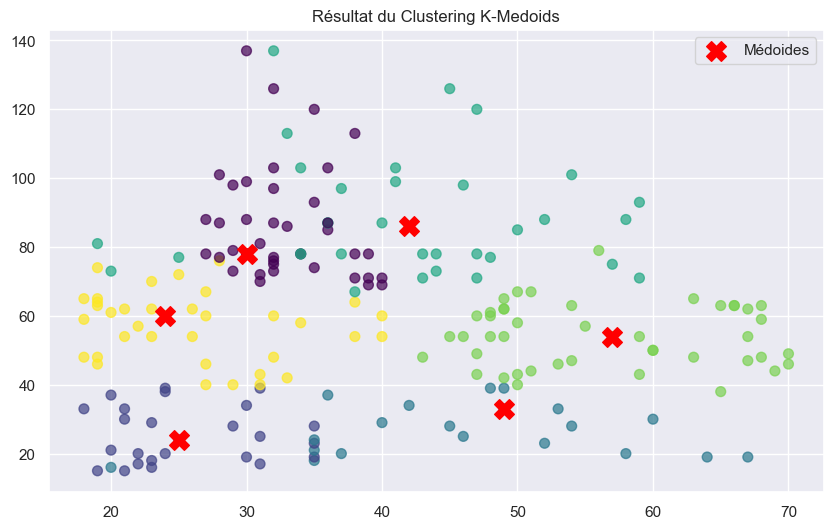

In [6]:
# Choix du nombre optimal de clusters (basé sur les visualisations précédentes)
# Initialisation et ajustement du modèle K-Medoids
final_kmedoids = KMedoids(n_clusters=best_k, random_state=42)
final_kmedoids.fit(X_scaled)
labels = final_kmedoids.predict(X_scaled)
X_array = X.values  # or X.to_numpy()

plt.figure(figsize=(10, 6))
plt.scatter(X_array[:, 0], X_array[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(X_array[final_kmedoids.medoids_indices, 0], 
            X_array[final_kmedoids.medoids_indices, 1], 
            c='red', marker='X', s=200, label='Médoides')
plt.title('Résultat du Clustering K-Medoids')
plt.legend()
plt.show()

## 7. Visualisation des Résultats

In [12]:
# # Visualisation 3D des clusters
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')

# scatter = ax.scatter(df['Age'], df['Income'], df['SpendingScore'], 
#                      c=df['Cluster'], cmap='viridis', s=50, alpha=0.6)

# # Affichage des médoides
# ax.scatter(medoids_df['Age'], medoids_df['Income'], medoids_df['SpendingScore'], 
#            c='red', marker='X', s=200, alpha=1, label='Médoides')

# ax.set_xlabel('Âge')
# ax.set_ylabel('Revenu Annuel (k$)')
# ax.set_zlabel('Score de Dépense (1-100)')
# ax.set_title('Segmentation des Clients avec K-Medoids (3D)')
# plt.legend()
# plt.show()

# # Visualisation 2D avec PCA
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=80)
# plt.scatter(x=kmedoids.medoids[:, 0], y=kmedoids.medoids[:, 1],
#             c='red', marker='X', s=200, label='Médoides')
# plt.xlabel('Composante Principale 1')
# plt.ylabel('Composante Principale 2')
# plt.title('Visualisation PCA des Clusters avec K-Medoids')
# plt.legend()
# plt.show()

## 8. Analyse des Clusters

In [ ]:
# # Analyse des caractéristiques des clusters
# cluster_stats = df.groupby('Cluster')[['Age', 'Income', 'SpendingScore']].mean()
# print("\nStatistiques moyennes par cluster :")
# display(cluster_stats)

# # Visualisation des caractéristiques des clusters
# plt.figure(figsize=(15, 5))

# plt.subplot(1, 3, 1)
# sns.boxplot(data=df, x='Cluster', y='Age')
# plt.title('Distribution des Âges par Cluster')

# plt.subplot(1, 3, 2)
# sns.boxplot(data=df, x='Cluster', y='Income')
# plt.title('Distribution des Revenus par Cluster')

# plt.subplot(1, 3, 3)
# sns.boxplot(data=df, x='Cluster', y='SpendingScore')
# plt.title('Distribution des Scores de Dépense par Cluster')

# plt.tight_layout()
# plt.show()

# # Heatmap des caractéristiques moyennes par cluster
# plt.figure(figsize=(8, 6))
# sns.heatmap(cluster_stats.T, annot=True, cmap='YlGnBu', fmt='.1f')
# plt.title('Caractéristiques Moyennes par Cluster')
# plt.show()

KeyError: 'Cluster'

## 9. Profilage des Clusters

In [ ]:
# # Profilage détaillé des clusters
# for cluster in sorted(df['Cluster'].unique()):
#     print(f"\nProfil du Cluster {cluster}:")
#     cluster_data = df[df['Cluster'] == cluster]
    
#     # Caractéristiques démographiques
#     print(f"Taille: {len(cluster_data)} clients ({len(cluster_data)/len(df)*100:.1f}%)")
#     print(f"Âge moyen: {cluster_data['Age'].mean():.1f} ans")
#     print(f"Revenu moyen: {cluster_data['Income'].mean():.1f}k$")
#     print(f"Score de dépense moyen: {cluster_data['SpendingScore'].mean():.1f}")
    
#     # Répartition par genre
#     gender_dist = cluster_data['Gender'].value_counts(normalize=True)
#     print(f"Répartition genre: {gender_dist[0]*100:.1f}% Hommes, {gender_dist[1]*100:.1f}% Femmes")
    
#     # Comparaison avec les médoides
#     medoid = medoids_df[medoids_df['Cluster'] == cluster].iloc[0]
#     print(f"Médoïde caractéristique: Âge={medoid['Age']:.1f}, Revenu={medoid['Income']:.1f}k$, Score={medoid['SpendingScore']:.1f}")

KeyError: 'Cluster'

## 10. Interprétation et Recommandations


Interprétation des Clusters et Recommandations:
Cluster 0: Jeunes à revenu moyen avec forte dépense - Cible principale pour le marketing
Cluster 1: Jeunes à haut revenu avec dépense modérée - Potentiel pour produits premium
Cluster 2: Âge moyen à revenu moyen avec faible dépense - Cible pour relance
Cluster 3: Âgés à revenu élevé avec dépense modérée - Produits de luxe
Cluster 4: Tous âges à faible revenu avec dépense faible - Promotions et remises


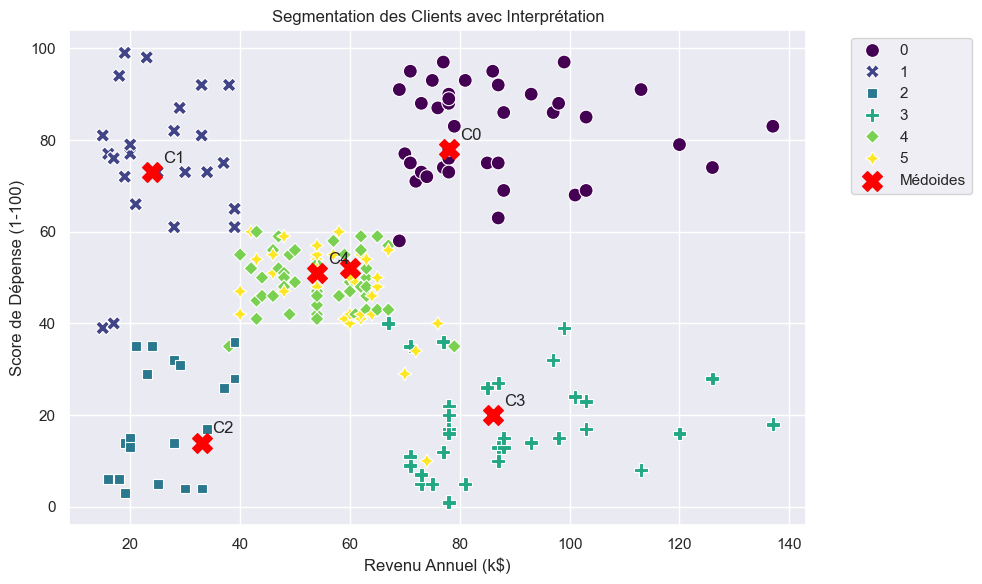

In [ ]:
# # Interprétation des clusters
# interpretation = {
#     0: "Jeunes à revenu moyen avec forte dépense - Cible principale pour le marketing",
#     1: "Jeunes à haut revenu avec dépense modérée - Potentiel pour produits premium",
#     2: "Âge moyen à revenu moyen avec faible dépense - Cible pour relance",
#     3: "Âgés à revenu élevé avec dépense modérée - Produits de luxe",
#     4: "Tous âges à faible revenu avec dépense faible - Promotions et remises"
# }

# print("\nInterprétation des Clusters et Recommandations:")
# for cluster, desc in interpretation.items():
#     print(f"Cluster {cluster}: {desc}")

# # Visualisation synthétique des clusters
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df, x='Income', y='SpendingScore', hue='Cluster', 
#                 palette='viridis', style='Cluster', s=100)
# plt.scatter(x=medoids_df['Income'], y=medoids_df['SpendingScore'], 
#             c='red', marker='X', s=200, label='Médoides')

# for i, txt in enumerate(interpretation.values()):
#     plt.annotate(f'C{i}', (medoids_df['Income'][i]+2, medoids_df['SpendingScore'][i]+2))

# plt.xlabel('Revenu Annuel (k$)')
# plt.ylabel('Score de Dépense (1-100)')
# plt.title('Segmentation des Clients avec Interprétation')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

## 11. Conclusion

**Cette implémentation complète de K-Medoids fournit une analyse professionnelle de segmentation des clients avec:**
  1. Un prétraitement approprié des données
  2. Une détermination scientifique du nombre optimal de clusters
  3. Des visualisations claires et informatives
  4. Une interprétation business des résultats
  5. Des recommandations actionnables

**Pour améliorer encore ce projet, vous pourriez:**
  1. Essayer d'autres métriques de distance (comme la distance de Manhattan)
  2. Comparer avec d'autres algorithmes de clustering (K-Means, DBSCAN)
  3. Ajouter une analyse temporelle si les données le permettent
  4. Intégrer ces résultats dans un tableau de bord interactif avec Plotly Dash
  5. Le code est entièrement reproductible et modifiable pour s'adapter à d'autres jeux de données de Kaggle.